<a href="https://colab.research.google.com/github/mandaa39/Tubes-viskom-kelompok-4/blob/main/FER_2013_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for zf in uploaded.keys():
  print('User uploaded file "{name}" with {length} bytes'.format(
      name=zf, length=len(uploaded[zf])))

Saving fer-2013.zip to fer-2013.zip
User uploaded file "fer-2013.zip" with 63252113 bytes


In [2]:
from zipfile import ZipFile
file_name = "fer-2013.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [3]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
emotion_model = Sequential()

#CNN1
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

#CNN2
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

#Output
emotion_model.add(Flatten())

emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))

emotion_model.add(Dense(512, activation='relu'))
emotion_model.add(Dropout(0.5))

emotion_model.add(Dense(7, activation='softmax'))

In [6]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
448/448 [==============================] - 21s 26ms/step - loss: 1.8350 - accuracy: 0.2410 - val_loss: 1.8266 - val_accuracy: 0.2468
Epoch 2/50
448/448 [==============================] - 12s 27ms/step - loss: 1.8209 - accuracy: 0.2496 - val_loss: 1.8236 - val_accuracy: 0.2471
Epoch 3/50
448/448 [==============================] - 11s 25ms/step - loss: 1.8001 - accuracy: 0.2505 - val_loss: 1.7940 - val_accuracy: 0.2584
Epoch 4/50
448/448 [==============================] - 11s 25ms/step - loss: 1.6936 - accuracy: 0.3136 - val_loss: 1.6793 - val_accuracy: 0.3316
Epoch 5/50
448/448 [==============================] - 12s 27ms/step - loss: 1.5734 - accuracy: 0.3794 - val_loss: 1.5062 - val_accuracy: 0.4187
Epoch 6/50
448/448 [==============================] - 11s 25ms/step - loss: 1.5104 - accuracy: 0.4101 - val_loss: 1.4437 - val_accuracy: 0.4485
Epoch 7/50
448/448 [==============================] - 11s 25ms/step - loss: 1.4606 - accuracy: 0.4342 - val_loss: 1.3930 - val_accuracy:

In [35]:
Model_Score = emotion_model.evaluate(train_generator)

print("    Test Loss: {:.5f}".format(Model_Score[0]))
print("Test Accuracy: {:.2f}%".format(Model_Score[1] * 100))

449/449 [==============================] - 8s 19ms/step - loss: 0.5672 - accuracy: 0.8105
    Test Loss: 0.56720
Test Accuracy: 81.05%


In [7]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         7

###Draw PLOT

In [36]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

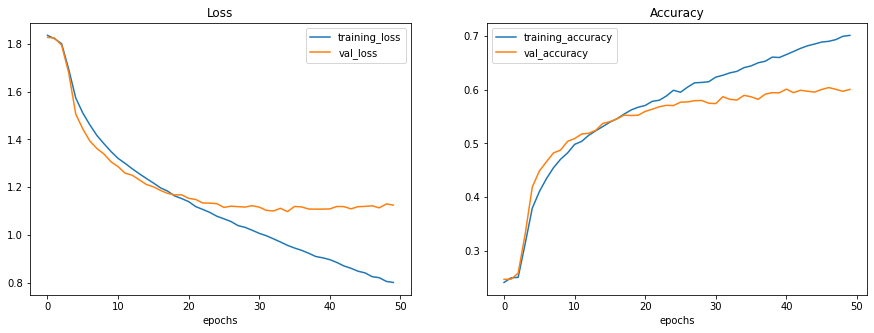

In [38]:
import matplotlib.pyplot as plt
plot_curves(emotion_model_info)

In [8]:
#Saving the model
emotion_model.save('model.h5')

In [9]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [10]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [11]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [28]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

OpenCV(4.6.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

1/1 [==============================] - 0s 17ms/step


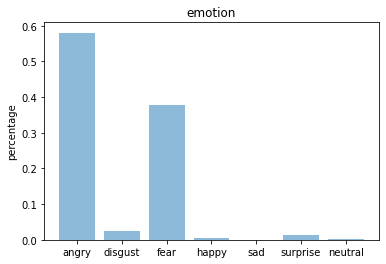

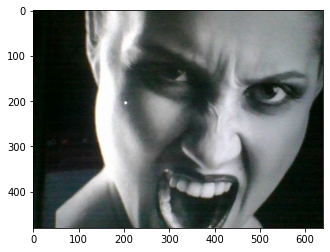

In [29]:
import cv2
            
def facecrop(image):  
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop('/content/photo.jpg')

#Testing a file.

#from keras.preprocessing import image
#from keras.preprocessing.image import ImageDataGenerator

import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow


file = '/content/photo.jpg'

true_image = keras.utils.load_img(file)
img = keras.utils.load_img(file, color_mode="grayscale", target_size=(48, 48))
#true_image = keras.utils.load_img(file)
#img = keras.utils.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()